# Лабораторная работа по анализу данных 1

Выполнил **Кипаренко Илья**




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [23]:
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip'
data = pd.read_csv('bank-additional-full.csv', sep = ';', engine = 'python')

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


- `age` (numeric)
- `job` : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- `marital` : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- `education` (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- `default`: has credit in default? (categorical: 'no','yes','unknown')
- `housing`: has housing loan? (categorical: 'no','yes','unknown')
- `loan`: has personal loan? (categorical: 'no','yes','unknown')
- `contact`: contact communication type (categorical: 'cellular','telephone') 
- `month`: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- `day_of_week`: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- `duration`: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- `campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- `previous`: number of contacts performed before this campaign and for this client (numeric)
- `poutcome`: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- `emp.var.rate`: employment variation rate - quarterly indicator (numeric)
- `cons.price.idx`: consumer price index - monthly indicator (numeric) 
- `cons.conf.idx`: consumer confidence index - monthly indicator (numeric) 
- `euribor3m`: euribor 3 month rate - daily indicator (numeric)
- `nr.employed`: number of employees - quarterly indicator (numeric)
- `y` - has the client subscribed a term deposit? (binary: 'yes','no')

In [22]:
print(data.shape)
print(data.columns)
print([data[c].dtype.name for c in data.columns])

(41188, 21)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
['int64', 'object', 'object', 'object', 'object', 'object', 'object', 'object', 'object', 'object', 'int64', 'int64', 'int64', 'int64', 'object', 'float64', 'float64', 'float64', 'float64', 'float64', 'object']


In [9]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


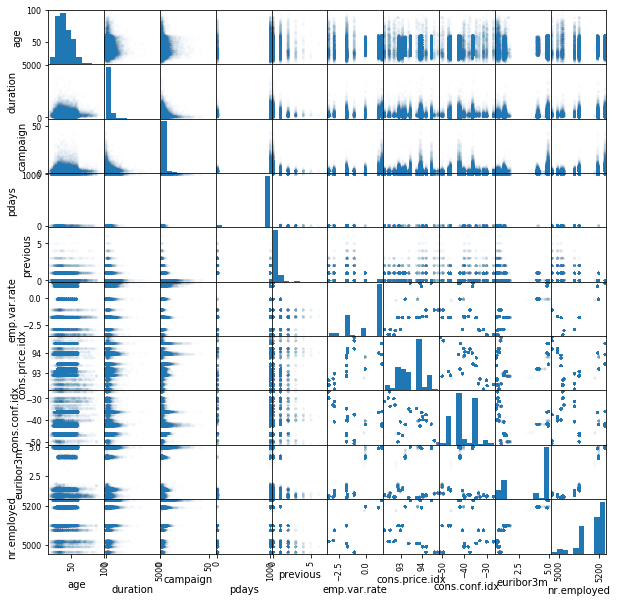

In [5]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

In [43]:
data.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [88]:
corrTable = data.corr()
for i in corrTable:
    for j in corrTable[i].index:
        if (i < j) and abs(corrTable[i][j]) > 0.9:
            print(i, j, corrTable[i][j])
        

emp.var.rate euribor3m 0.9722446711515584
emp.var.rate nr.employed 0.9069701012559412
euribor3m nr.employed 0.9451544313983309


Как мы видим три столбца наших данных сильно коррелируют между собой, два из них можно удалить.

In [24]:
data = data.drop(['euribor3m', 'nr.employed'], axis = 1)

In [15]:
data.describe(include = ['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [16]:
data.describe(include = 'all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,NaN,NaN,NaN,NaN,35563,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.285010,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.279249,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,NaN


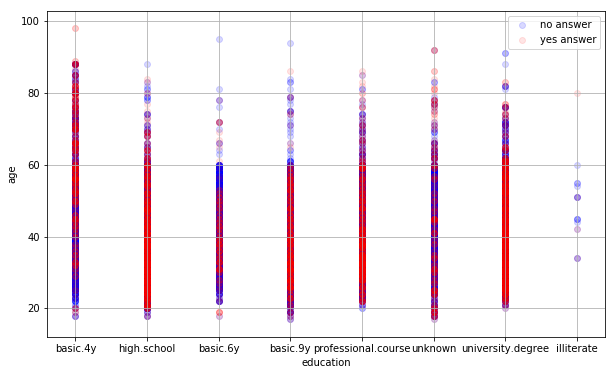

In [17]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['y'] == 'no']['education'],
            data[data['y'] == 'no']['age'],
            alpha = 0.15,
            label = 'no answer',
            color = 'b')

plt.scatter(data[data['y'] == 'yes']['education'],
            data[data['y'] == 'yes']['age'],
            alpha = 0.10,
            label = 'yes answer',
            color = 'r')

plt.xlabel('education')
plt.ylabel('age')
plt.legend()
plt.grid()

In [ ]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['y'] == 'no']['education'],
            data[data['y'] == 'no']['age'],
            alpha = 0.15,
            label = 'no answer',
            color = 'b')

plt.scatter(data[data['y'] == 'yes']['education'],
            data[data['y'] == 'yes']['age'],
            alpha = 0.10,
            label = 'yes answer',
            color = 'r')

plt.xlabel('education')
plt.ylabel('age')
plt.legend()
plt.grid()

# Готовим данные

In [25]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx']


In [19]:
for name in categorical_columns:
    print(data[name].value_counts(), "\n")

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 

no         32588
unknown     8597
yes            3
Name: default, dtype: int64 

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64 

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64 

cellular     26144
telephone    15044
Name: contact, dtype: int64 

may    13769
jul     717

Как мы видим, классы в наших данных сильно доминированы классом `no`
Это значит что если наш классификатор всегда будет предсказывать `no`  то ошибка составит
4640 / (36548 + 4640) или 0.112. 

In [233]:
4640 / (36548 + 4640)

0.11265417111780131

## Обрабатываем пропущенные значения

В наших данных пропущенными значениями являются `unknown` в некоторых столбцах.

Заменим их на самое популярное значение.

Так как стобец `default` после этой операции станет практически полностью `no` мы его удалим.

Также создатели датасет рекомендуют не пользоваться столбцом `duration` (так как он нечестно получен?)


In [26]:
for name in ['job', 'education', 'marital', 'housing', 'loan']:
    data.loc[data[name] == 'unknown', name] = data[name].describe().top
    
for name in categorical_columns:
    print(data[name].value_counts(), "\n")
data = data.drop(['default', 'duration'], axis=1)

categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']

admin.           10752
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64 

married     25008
single      11568
divorced     4612
Name: marital, dtype: int64 

university.degree      13899
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64 

no         32588
unknown     8597
yes            3
Name: default, dtype: int64 

yes    22566
no     18622
Name: housing, dtype: int64 

no     34940
yes     6248
Name: loan, dtype: int64 

cellular     26144
telephone    15044
Name: contact, dtype: int64 

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, d

## Векторизация

Нужно что-то сделать с категориальными (номинальными) признаками

In [27]:
data_describe = data.describe(include = [object])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['housing', 'loan', 'contact', 'y'] ['job', 'marital', 'education', 'month', 'day_of_week', 'poutcome']


In [36]:
for name in binary_columns:
    A, B = data[name].unique()
    data.at[data[name] == A, name] = 0
    data.at[data[name] == B, name] = 1

К небинарными признакам применим метод _векторизации_, 
который заключается в следующем.

Признак `j`, принимающий `s` значений, заменим на `s` признаков, принимащих значения `0` или `1`,
в зависимости от того, чему равно значение исходного признака `j`.

Например, в нашей задаче признак `marital` принимает 3 различных значения: 

In [29]:
data['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

Заменим признак `marital` 3 признаками: `marital_married`, `marital_single`, `marital_unknown`.


In [30]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'month_apr', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')


## Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных.
К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно _нормализовать_.
Это можно делать разными способами.
Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [32]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,age,housing,loan,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,0.547878,0.151695,0.634748,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600
std,10.42125,0.497708,0.358729,0.481507,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198
min,17.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000
25%,32.00000,0.000000,0.000000,0.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000
50%,38.00000,1.000000,0.000000,1.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000
75%,47.00000,1.000000,0.000000,1.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000
max,98.00000,1.000000,1.000000,1.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000


In [33]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [34]:
data_numerical.describe()

,age,housing,loan,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx
count,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04
mean,-1.009196e-16,-5.986169e-17,-1.092864e-16,-1.590561e-16,-9.591671e-17,-2.842999e-16,6.624464e-17,-4.218210e-13,-8.643368e-11,-2.132652e-12
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.209338e+00,-1.100801e+00,-4.228670e-01,-1.318254e+00,-5.659151e-01,-5.149381e+00,-3.494900e-01,-2.216407e+00,-2.374861e+00,-2.224926e+00
25%,-7.699710e-01,-1.100801e+00,-4.228670e-01,-1.318254e+00,-5.659151e-01,1.954115e-01,-3.494900e-01,-1.197921e+00,-8.649442e-01,-4.747852e-01
50%,-1.942243e-01,9.084073e-01,-4.228670e-01,7.585608e-01,-2.049060e-01,1.954115e-01,-3.494900e-01,6.480844e-01,2.994534e-01,-2.803250e-01
75%,6.693957e-01,9.084073e-01,-4.228670e-01,7.585608e-01,1.561030e-01,1.954115e-01,-3.494900e-01,8.390505e-01,7.227137e-01,8.864358e-01
max,5.563242e+00,9.084073e-01,2.364752e+00,7.585608e-01,1.928958e+01,1.954115e-01,1.379475e+01,8.390505e-01,2.058143e+00,2.939071e+00


## Соединяем все в одну таблицу

In [37]:
data_cleaned = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data_cleaned.shape)
print(data_cleaned.columns)
data_cleaned.head()

(41188, 53)
Index(['age', 'housing', 'loan', 'contact', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'month_apr', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success',
       'housing', 'loan', 'contact', 'y'],
      dtype='obje

,age,housing,loan,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,housing,loan,contact,y
0,1.533016,-1.100801,-0.422867,-1.318254,-0.565915,0.195412,-0.34949,0.648084,0.722714,0.886436,...,0,0,0,0,1,0,0,0,0,0
1,1.628973,-1.100801,-0.422867,-1.318254,-0.565915,0.195412,-0.34949,0.648084,0.722714,0.886436,...,0,0,0,0,1,0,0,0,0,0
2,-0.290182,0.908407,-0.422867,-1.318254,-0.565915,0.195412,-0.34949,0.648084,0.722714,0.886436,...,0,0,0,0,1,0,1,0,0,0
3,-0.002309,-1.100801,-0.422867,-1.318254,-0.565915,0.195412,-0.34949,0.648084,0.722714,0.886436,...,0,0,0,0,1,0,0,0,0,0
4,1.533016,-1.100801,2.364752,-1.318254,-0.565915,0.195412,-0.34949,0.648084,0.722714,0.886436,...,0,0,0,0,1,0,0,1,0,0


In [38]:
data_cleaned.describe()

,age,housing,loan,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,housing,loan,contact,y
count,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,-1.009196e-16,-5.986169e-17,-1.092864e-16,-1.590561e-16,-9.591671e-17,-2.842999e-16,6.624464e-17,-4.218210e-13,-8.643368e-11,-2.132652e-12,...,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335,0.547878,0.151695,0.634748,0.112654
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512,0.497708,0.358729,0.481507,0.316173
min,-2.209338e+00,-1.100801e+00,-4.228670e-01,-1.318254e+00,-5.659151e-01,-5.149381e+00,-3.494900e-01,-2.216407e+00,-2.374861e+00,-2.224926e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.699710e-01,-1.100801e+00,-4.228670e-01,-1.318254e+00,-5.659151e-01,1.954115e-01,-3.494900e-01,-1.197921e+00,-8.649442e-01,-4.747852e-01,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.942243e-01,9.084073e-01,-4.228670e-01,7.585608e-01,-2.049060e-01,1.954115e-01,-3.494900e-01,6.480844e-01,2.994534e-01,-2.803250e-01,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,6.693957e-01,9.084073e-01,-4.228670e-01,7.585608e-01,1.561030e-01,1.954115e-01,-3.494900e-01,8.390505e-01,7.227137e-01,8.864358e-01,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,5.563242e+00,9.084073e-01,2.364752e+00,7.585608e-01,1.928958e+01,1.954115e-01,1.379475e+01,8.390505e-01,2.058143e+00,2.939071e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Helper functions

In [39]:
from sklearn.model_selection import train_test_split

def split(data, test_size = 0.7, random_state = 42):
    X = data.drop(('y'), axis = 1) # выбрасываем столбец 'y'
    y = data['y']
    
    ans = train_test_split(X, y, test_size=test_size, random_state=random_state)
    print("Train|Test split = ", ans[0].shape[0], ans[1].shape[0])
    return ans

def work(data_splitted, method, n_jobs=-1, **kwargs):
    X_train, X_test, y_train, y_test = data_splitted
    try:
        method_obj = method(n_jobs=n_jobs, **kwargs)
    except:
        method_obj = method(**kwargs) #  если метод не имеет параметра n_jobs
    method_name = str(method_obj).split('(')[0]

    method_obj.fit(X_train, y_train)
    
    y_train_predict = method_obj.predict(X_train)
    y_test_predict = method_obj.predict(X_test)

    err_train = np.mean(y_train != y_train_predict)
    err_test  = np.mean(y_test  != y_test_predict)

    print(method_name, "result error is", err_train, err_test)
    
    return method_obj, (y_train_predict, y_test_predict)

data_s = split(data_cleaned)
X_train, X_test, y_train, y_test = data_s

feature_names = X_train.columns
feature_names

Train|Test split =  12356 28832


Index(['age', 'housing', 'loan', 'contact', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'month_apr', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success',
       'housing', 'loan', 'contact'],
      dtype='object')

# $k$NN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
ans = work(data_s, KNeighborsClassifier, n_neighbors=10)

KNeighborsClassifier result error is 0.09614762058918744 0.10346143174250833


### Подбор параметров

In [41]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.09954677889284558 45


In [42]:
ans = work(data_s, KNeighborsClassifier, n_neighbors=best_n_neighbors)

KNeighborsClassifier result error is 0.09889932016833927 0.10207408435072142


In [43]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, ans[1][1]))

[[25257   331]
 [ 2612   632]]


Как мы видим результат алгоритма слабо отличается от нашей оценки.
0.112 против 0.103.
Как мы видим из `confusion matrix` большая часть ошибок - ложноотрицательные.

# SVC

In [44]:
from sklearn.svm import SVC
ans = work(data_s, SVC)

SVC result error is 0.09881838782777598 0.10106825749167592


### Подбор параметров

In [45]:
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC()
#grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array}, n_jobs=-1)
grid = GridSearchCV(svc, param_grid = {'C': Cs}, n_jobs=-1)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

0.09873745548721269 10.0


In [46]:
ans = work(data_s, SVC, C = best_C)

SVC result error is 0.08716413078666235 0.10068673695893451


# Random Forest

In [47]:
from sklearn import ensemble
ans = work(data_s, ensemble.RandomForestClassifier, n_estimators = 1000)

RandomForestClassifier result error is 0.0030754289414049855 0.1081784128745838


### Значимость признаков

In [117]:
rf = ans[0]
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(len(indices)):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))   

Feature ranking:
 1. feature '  age' (0.137217)
 2. feature 'euribor3m' (0.117380)
 3. feature 'campaign' (0.069739)
 4. feature 'nr.employed' (0.053801)
 5. feature 'pdays' (0.035821)
 6. feature 'cons.conf.idx' (0.030931)
 7. feature 'cons.price.idx' (0.026668)
 8. feature 'emp.var.rate' (0.025221)
 9. feature 'poutcome_success' (0.023002)
10. feature 'housing_yes' (0.020970)
11. feature 'housing_no' (0.020872)
12. feature 'job_admin.' (0.017982)
13. feature 'marital_married' (0.017805)
14. feature 'education_high.school' (0.016413)
15. feature 'education_university.degree' (0.016322)
16. feature 'marital_single' (0.016078)
17. feature 'previous' (0.016001)
18. feature 'day_of_week_wed' (0.015930)
19. feature 'day_of_week_fri' (0.015712)
20. feature 'day_of_week_thu' (0.015619)
21. feature 'day_of_week_mon' (0.015612)
22. feature 'day_of_week_tue' (0.015487)
23. feature 'job_technician' (0.015016)
24. feature 'contact' (0.014286)
25. feature 'loan_no' (0.014222)
26. feature 'loan_yes

(-1, 20)

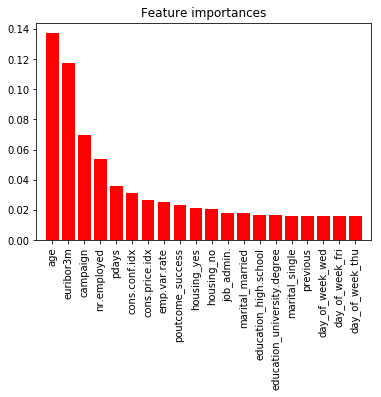

In [118]:
d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

In [59]:
# Авторы датасета сказали что `duration` это плохая фича
# Попробуем без неё

data_s2 = split(data_cleaned.drop('duration', axis = 1))
ans = work(data_s2, ensemble.RandomForestClassifier, n_estimators = 1000)

Train|Test split =  12356 28832
RandomForestClassifier result error is 0.0020233085140822274 0.10578523862375139


Использование только признаков
`age`, `hourse-per-week`, `education-num`, `marital-status`, `relationship`, `occupation`
существенно улучшает точность (понижает ошибку до 16-19%) на алгоритмах kNN и SVC.
На самом деле, решающую роль играет удаление признака `fnlwgt`

# Extremely Randomized Trees

In [48]:
ans = work(data_s, ensemble.ExtraTreesClassifier, n_estimators = 100)

ExtraTreesClassifier result error is 0.0030754289414049855 0.1224680910099889


# AdaBoost

In [49]:
ans = work(data_s, ensemble.AdaBoostClassifier, n_estimators = 100)

AdaBoostClassifier result error is 0.09663321463256717 0.10183129855715871


# GBT

In [50]:
ans = work(data_s, ensemble.GradientBoostingClassifier, n_estimators = 100)

GradientBoostingClassifier result error is 0.08943023632243445 0.10086015538290788


## Дополнительный тест

Если мы не будем убирать `duration` то результаты немного улучшаться

Если же не делать других вещей, то они ухудшаться совсем немного.

In [78]:
def generate(conditions):
    enable_duration, clean_correlation, clean_unknown, clean_dates = conditions
    data_clear = pd.read_csv('bank-additional-full.csv', sep = ';', engine = 'python')

    if not enable_duration:
        data_clear = data_clear.drop(['duration'], axis = 1)
        
    if clean_correlation:
        data_clear = data_clear.drop(['euribor3m', 'nr.employed'], axis = 1)
        
    if clean_unknown:
        for name in ['job', 'education', 'marital', 'housing', 'loan']:
            data_clear.loc[data_clear[name] == 'unknown', name] = data_clear[name].describe().top
        data_clear = data_clear.drop(['default'], axis=1)
        
    if clean_dates:
        drops = ['month', 'day_of']
        drop_columns = [a for a in data_clear.columns if ('month' in a or 'day_of' in a)]
        data_clear = data_clear.drop(drop_columns, axis=1)

    categorical_columns = [c for c in data_clear.columns if data_clear[c].dtype.name == 'object']
    numerical_columns   = [c for c in data_clear.columns if data_clear[c].dtype.name != 'object']

    data_describe = data_clear.describe(include = [object])
    binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
    nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]

    for name in binary_columns:
        A, B = data_clear[name].unique()
        data_clear.at[data_clear[name] == A, name] = 0
        data_clear.at[data_clear[name] == B, name] = 1

    data_nonbinary = pd.get_dummies(data_clear[nonbinary_columns])

    data_numerical = data_clear[numerical_columns]
    data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

    data_cleaned = pd.concat((data_numerical, data_nonbinary, data_clear[binary_columns]), axis = 1)
    
    return split(data_cleaned)

In [65]:
data_s2 = generate([True, False, False, False])

Train|Test split =  12356 28832


In [66]:
ans = work(data_s2, SVC, C = best_C)

SVC result error is 0.09193913887989641 0.10242092119866815


### Попробуем все возможные комбинации!

In [81]:
data_pack = []
for i in range(16):
    k = np.array([a == '1' for a in bin(i)[2:].zfill(4)])
    data_pack.append((generate(k), k))

Train|Test split =  12356 28832
Train|Test split =  12356 28832
Train|Test split =  12356 28832
Train|Test split =  12356 28832
Train|Test split =  12356 28832
Train|Test split =  12356 28832
Train|Test split =  12356 28832
Train|Test split =  12356 28832
Train|Test split =  12356 28832
Train|Test split =  12356 28832
Train|Test split =  12356 28832
Train|Test split =  12356 28832
Train|Test split =  12356 28832
Train|Test split =  12356 28832
Train|Test split =  12356 28832
Train|Test split =  12356 28832


In [82]:
for data, k in data_pack:
    print("K = ", k)
    ans = work(data, KNeighborsClassifier, n_neighbors=10)
    ans = work(data, ensemble.AdaBoostClassifier, n_estimators = 100)
    ans = work(data, SVC, C = best_C)
    print("\n")
    

K =  [False False False False]
KNeighborsClassifier result error is 0.092667529944966 0.10307991120976692
AdaBoostClassifier result error is 0.09622855292975073 0.10051331853496115
SVC result error is 0.08837811589511169 0.1009642064372919


K =  [False False False  True]
KNeighborsClassifier result error is 0.09291032696665588 0.10190066592674805
AdaBoostClassifier result error is 0.0971997410165102 0.10151914539400667
SVC result error is 0.09161540951764326 0.10144977802441732


K =  [False False  True False]
KNeighborsClassifier result error is 0.09307219164778245 0.10210876803551609
AdaBoostClassifier result error is 0.09598575590806085 0.10061736958934517
SVC result error is 0.08708319844609906 0.10106825749167592


K =  [False False  True  True]
KNeighborsClassifier result error is 0.09185820653933312 0.10280244173140954
AdaBoostClassifier result error is 0.09695694399482033 0.10141509433962265
SVC result error is 0.09064422143088378 0.10193534961154273


K =  [False  True False 

Вот мы увидели что у нас не получилось значительно улучшить результат